<a href="https://colab.research.google.com/github/alirezabayatmk/MNIST-CNN/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras import models

np.random.seed(2)

Using TensorFlow backend.


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth,files
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.6MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1ISfDAlCFOlZYTMs9ZUxW-PXs5bGigJSk'
fluff, id = link.split('=')
print (id) 
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('mnist_train.csv')  
train = pd.read_csv('mnist_train.csv')

1ISfDAlCFOlZYTMs9ZUxW-PXs5bGigJSk


In [0]:
train.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
link = 'https://drive.google.com/open?id=1lckyMjuHp0m_xqj1GxfSdfem59AZOFuy'
fluff, id = link.split('=')
print (id) 
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('mnist_test.csv')  
test = pd.read_csv('mnist_test.csv')

1lckyMjuHp0m_xqj1GxfSdfem59AZOFuy


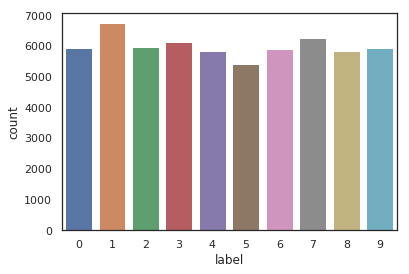

In [0]:
Y_train = train["label"]

X_train = train.drop(labels = ["label"],axis = 1) 

del train 

g = sns.countplot(Y_train)

In [0]:
X_train = X_train / 255.0
test = test / 255.0

In [0]:
X_train.shape

(60000, 784)

In [0]:
test.shape

(10000, 785)

In [0]:
X_train = X_train.values.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [0]:
Y_train_value = Y_train 
Y_train = to_categorical(Y_train, num_classes = 10)
Y_train.shape

(60000, 10)

In [0]:
random_seed = 2

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)
X_train.shape

(54000, 28, 28, 1)

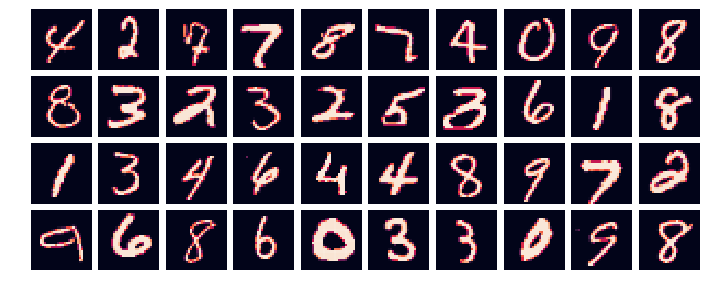

In [0]:
plt.figure(figsize=(12,4.8))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape((28,28)),interpolation='nearest')
    plt.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [0]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3, 3),strides = (1,1) ,padding = 'valid' ,activation='relu' ,input_shape = (28, 28, 1)))
model.add(MaxPool2D(strides=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3),strides = (1,1) ,padding = 'valid' ,activation='relu'))
model.add(MaxPool2D(strides=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3),strides = (1,1) ,padding = 'valid' ,activation='relu'))
model.add(MaxPool2D(strides=(2,2)))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_3 (MaxP

In [0]:
sgd = optimizers.SGD(lr=0.01 , momentum=0.5)
model.compile(optimizer = sgd , loss = "categorical_crossentropy", metrics=["accuracy"])


In [0]:
datagen = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)

datagen.fit(X_train)

In [0]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=500),
                              epochs = 30, validation_data = (X_val,Y_val),
                              steps_per_epoch=50)

Epoch 1/30
50/50 [==============================] - 55s 1s/step - loss: 2.0319 - acc: 0.2782 - val_loss: 2.0301 - val_acc: 0.4992
Epoch 2/30
50/50 [==============================] - 54s 1s/step - loss: 1.9564 - acc: 0.3004 - val_loss: 1.9574 - val_acc: 0.5358
Epoch 3/30
50/50 [==============================] - 55s 1s/step - loss: 1.8743 - acc: 0.3315 - val_loss: 1.8934 - val_acc: 0.5815
Epoch 4/30
50/50 [==============================] - 54s 1s/step - loss: 1.7997 - acc: 0.3558 - val_loss: 1.8236 - val_acc: 0.5432
Epoch 5/30
50/50 [==============================] - 54s 1s/step - loss: 1.7225 - acc: 0.3804 - val_loss: 1.7910 - val_acc: 0.6230
Epoch 6/30
50/50 [==============================] - 54s 1s/step - loss: 1.6704 - acc: 0.4024 - val_loss: 1.7206 - val_acc: 0.6643
Epoch 7/30
50/50 [==============================] - 54s 1s/step - loss: 1.6276 - acc: 0.4132 - val_loss: 1.7253 - val_acc: 0.6215
Epoch 8/30
50/50 [==============================] - 55s 1s/step - loss: 1.5842 - acc: 0.43

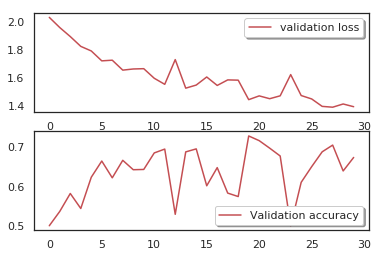

In [0]:
 fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

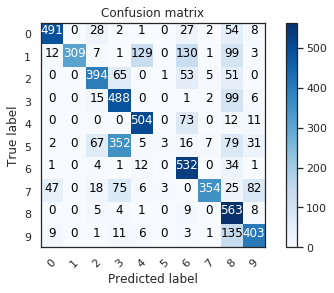

In [0]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [0]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    n = 0
    nrows = 3
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(7,7))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 9 errors 
most_important_errors = sorted_dela_errors[-9:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [0]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=500),
                              epochs = 10, validation_data = (X_val,Y_val),
                              steps_per_epoch = 10,
                              callbacks=[annealer])

In [0]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
#ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

#ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [0]:
layer1 = model.layers[0]
layer1.name
conv2d_1w = layer1.get_weights()[0][:,:,0,:]
for i in range(1,17):
      plt.subplot(4,4,i)
      plt.imshow(conv2d_1w[:,:,i-1],interpolation="nearest",cmap="gray")
plt.show()

In [0]:
# visualize convolution and pool layer
test_im = X_train[2]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')

# activation output
layer_outputs = [layer.output for layer in model.layers[:12]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

layer_names = []
for layer in model.layers:
    layer_names.append(layer.name) 
images_per_row = 4
for layer_name, layer_activation in zip(layer_names[:12], activations):
    #if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name, fontsize = 20)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')